In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
plt.rcParams.update({'figure.max_open_warning': 0})
%matplotlib inline

In [2]:
data = pd.read_csv('../clean/macro/post2009_naics.csv')

In [3]:
data.shape

(3396334, 5)

In [4]:
data.head()

,CASE_SUBMITTED,EMPLOYER_STATE,WORKSITE_STATE,NAICS_CLASSIFICATION,TOTAL_WORKERS
0,2009-07-01,MD,NJ,"Software Publishers, Computer Services",1.0
1,2009-07-01,NY,TN,"Software Publishers, Computer Services",8.0
2,2009-07-01,TX,TX,"Other Educational, Public Affairs",1.0
3,2009-07-01,CA,CA,"Media, Advertising, Telecommunications",1.0
4,2009-07-01,IL,IL,Colleges & Universities,1.0


In [5]:
data_group = data.groupby(by = ['CASE_SUBMITTED']).sum()

In [6]:
data_group['CASE_SUBMIT'] = data_group.index
data_group['CASE_SUBMIT'] = pd.DatetimeIndex(data_group['CASE_SUBMIT'])
data_group.index = data_group['CASE_SUBMIT']

In [7]:
data_group.head()

,TOTAL_WORKERS,CASE_SUBMIT
CASE_SUBMIT,,
2009-07-01,417.0,2009-07-01
2009-07-02,335.0,2009-07-02
2009-07-03,60.0,2009-07-03
2009-07-04,3.0,2009-07-04
2009-07-05,2.0,2009-07-05


In [8]:
df = data_group.resample('W').sum()

In [9]:
df.head()

,TOTAL_WORKERS
CASE_SUBMIT,
2009-07-05,817.0
2009-07-12,4041.0
2009-07-19,5468.0
2009-07-26,5419.0
2009-08-02,4278.0


In [10]:
df['ds'] = df.index
df = df.reset_index(drop=True)
#df['TOTAL_WORKERS'] = np.log(df['TOTAL_WORKERS'])

In [11]:
df.tail()

,TOTAL_WORKERS,ds
413,10088.0,2017-06-04
414,12618.0,2017-06-11
415,12630.0,2017-06-18
416,13577.0,2017-06-25
417,2304.0,2017-07-02


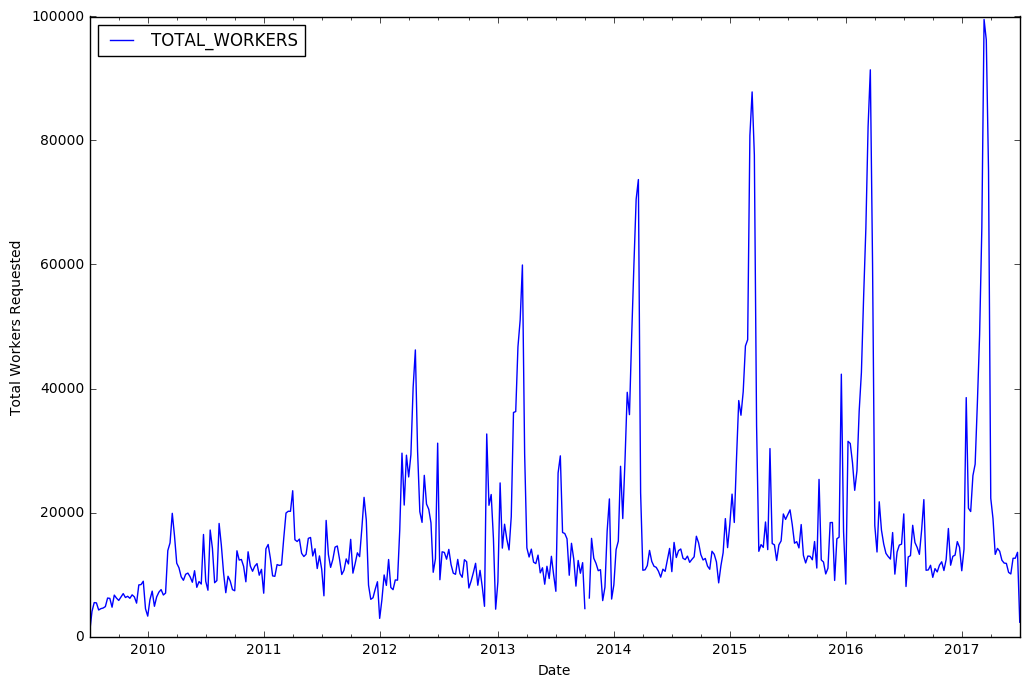

In [12]:
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Total Workers Requested')
ax.set_xlabel('Date')
plt.show()

In [13]:
march = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2010-03-19', '2011-03-19', '2012-03-19']
                        ),
  'lower_window': -30,
  'upper_window': 18,
})

march1 = pd.DataFrame({
  'holiday': 'playoff1',
  'ds': pd.to_datetime(['2016-03-16', '2017-03-16',
                        '2015-03-16']
                        ),
  'lower_window': -25,
  'upper_window': 20,
})

march2 = pd.DataFrame({
  'holiday': 'playoff2',
  'ds': pd.to_datetime(['2013-04-15']
                        ),
  'lower_window': -45,
  'upper_window': 12,
})

hols = pd.concat((march, march1, march2))

In [14]:
datelist = [['2010-1-1', '2012-12-31', '2013-1-1', '2013-12-31'],
            ['2011-1-1', '2013-12-31', '2014-1-1', '2014-12-31'],['2012-1-1', '2014-12-31', '2015-1-1', '2015-12-31'],
            ['2013-1-1', '2015-12-31', '2016-1-1', '2016-12-31'],['2014-1-1', '2016-12-31', '2017-1-1', '2017-03-31'],
            ['2009-7-1', '2015-3-31', '2015-4-1', '2017-3-31']]

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


0
MAE :  6702.59137028
MAPE :  34.6300951932


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


1
MAE :  7288.15939751
MAPE :  34.7501188196


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2
MAE :  6738.39200731
MAPE :  27.6111646035
3


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MAE :  6404.35401782
MAPE :  35.4040634082
4


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MAE :  10264.9900457
MAPE :  20.4804543099


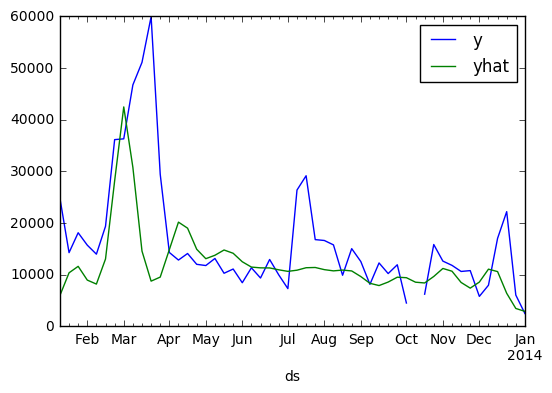

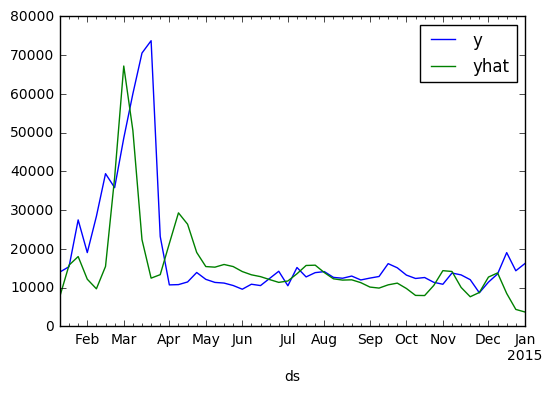

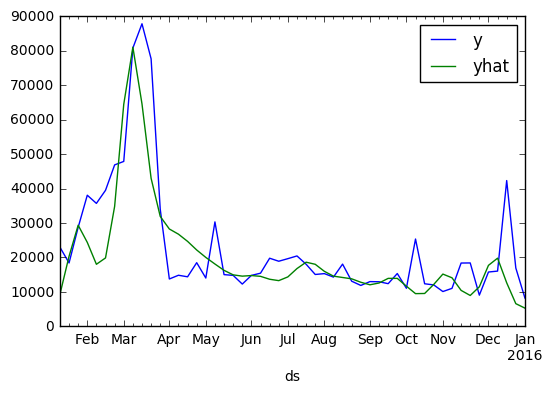

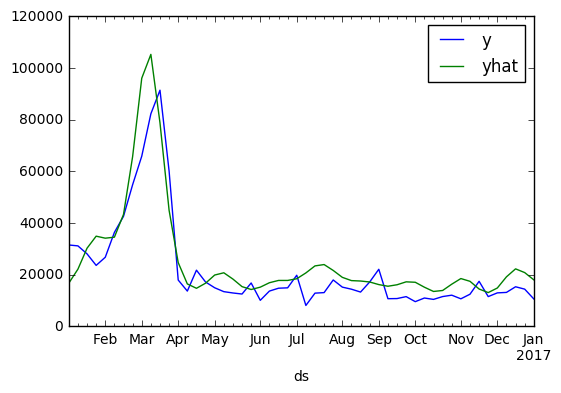

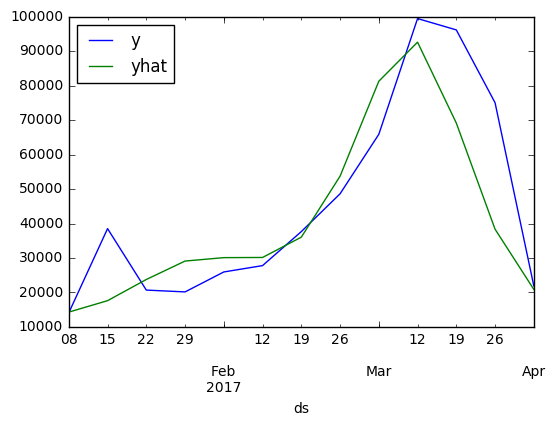

In [15]:
columns1 = ['ds', 'diff', 'yhat', 'yhat_lower','yhat_upper', 'y']
ini = pd.DataFrame(columns=columns1)
for idx in range(len(datelist) - 1):    
    print(idx)
    
    mask = (data_group['CASE_SUBMIT'] >= datelist[idx][0]) & (data_group['CASE_SUBMIT'] <= datelist[idx][1])
    newdf = data_group.loc[mask]

    valmask = (data_group['CASE_SUBMIT'] >= datelist[idx][2]) & (data_group['CASE_SUBMIT'] <= datelist[idx][3])
    valdf = data_group.loc[valmask]
    

    newdf = newdf.rename(columns={'CASE_SUBMIT': 'ds',
                        'TOTAL_WORKERS': 'y'})
    valdf = valdf.rename(columns={'CASE_SUBMIT': 'ds',
                        'TOTAL_WORKERS': 'y'})

    newdf = newdf.resample('W').sum()
    valdf = valdf.resample('W').sum()

    newdf['y'] = np.log(newdf['y'])
    valdf['y'] = np.log(valdf['y'])
    
    if(idx == 0):
        ini = newdf
        ini['yhat_lower'] = None
        ini['yhat_upper'] = None
        ini['yhat'] = None

    
    #newdf['y'] = repl(newdf)

    newdf['ds'] = newdf.index
    newdf = newdf.reset_index(drop=True)
    valdf['ds'] = valdf.index
    valdf = valdf.reset_index(drop=True)

    my_model = Prophet(holidays = hols, holidays_prior_scale = 5)

    my_model.fit(newdf)
    if(idx == 0):
        future_dates = my_model.make_future_dataframe(periods=52, freq='W')

        forecast = my_model.predict(future_dates)

        #my_model.plot(forecast)

        fc = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
        ans = fc.merge(valdf[-52:])
        
    elif(idx == len(datelist) - 2):
        future_dates = my_model.make_future_dataframe(periods=13, freq='W')

        forecast = my_model.predict(future_dates)

        #my_model.plot(forecast)

        fc = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
        ans = fc.merge(valdf[-13:])
    else:
        future_dates = my_model.make_future_dataframe(periods=52, freq='W')

        forecast = my_model.predict(future_dates)

        #my_model.plot(forecast)

        fc = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
        ans = fc.merge(valdf[-52:])

    
    ans['diff'] = abs(np.exp(ans['y'])-np.exp(ans['yhat']))
    print("MAE : ",ans['diff'].mean())

    rl = ans['diff']/np.exp(ans['y'])
    print("MAPE : ", rl.mean() * 100)
    
    ans.index = ans.ds
    ini = pd.concat((ini,ans))
    pl = ans[['y','yhat']]
    pl['y'] = np.exp(pl['y'])
    pl['yhat'] = np.exp(pl['yhat'])
    pl.plot()



In [16]:
print("MAE : ",ini['diff'].mean())

rl = ini['diff']/np.exp(ini['y'])
print("MPAE : ", rl.mean() * 100)

MAE :  6989.47323843
MPAE :  32.346267255


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


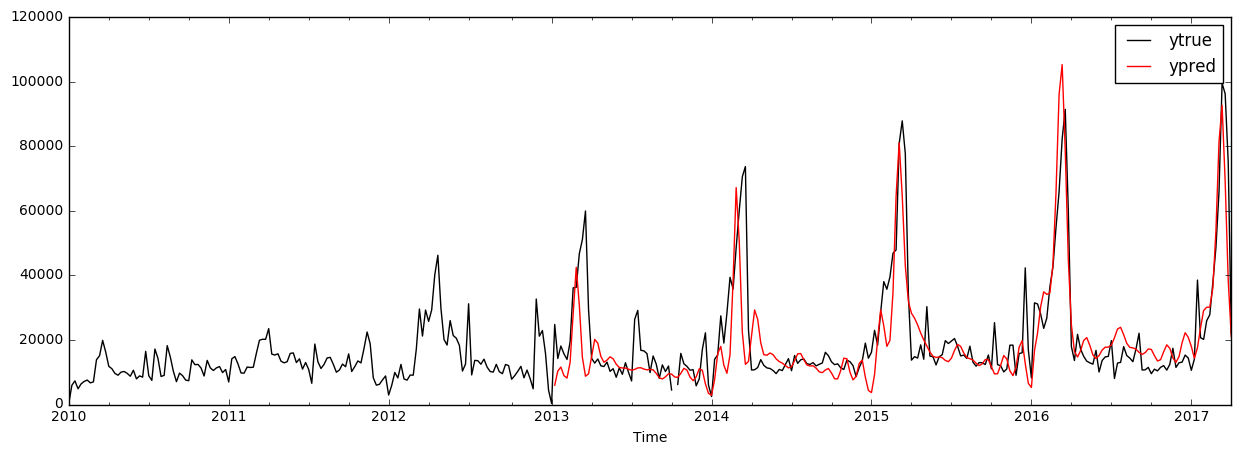

In [46]:
inidf = ini[['y', 'yhat']]
inidf['ytrue'] = np.exp(inidf['y'])
inidf['ypred'] = np.exp(inidf['yhat'])
inidf.index.name = "Time"
inidf[['ytrue', 'ypred']].plot(figsize=(15, 5), color = ('black', 'red'))

In [47]:
new =inidf.dropna()
new = new.resample('Q').sum()
new.head()

,y,yhat,ytrue,ypred
Time,,,,
2013-03-31,122.440512,113.939969,365717.0,192266.746232
2013-06-30,121.567419,123.887933,151429.0,182137.187422
2013-09-30,123.750201,119.784053,191895.0,131404.522664
2013-12-31,110.291611,108.451684,131350.0,105217.473237
2014-03-31,132.608303,126.061262,457849.0,285935.717902


In [48]:
new['diff'] = abs(new['ytrue']-new['ypred'])
print("MAE : ",new['diff'].mean())

rl = new['diff']/new['ytrue']
print("MAPE : ", rl.mean() * 100)

MAE :  57149.2303928
MAPE :  22.1634215165


In [50]:
ybar = new['ytrue'].mean()
SSy = ((new['ytrue'] - ybar)**2).sum()
e2 = ((new['ypred'] - new['ytrue'])**2).sum()
print ('R2 :', 1 - e2/SSy)

R2 : 0.794152201398


In [21]:
my_model = Prophet(changepoint_prior_scale=0.001,holidays = hols)
df = df.rename(columns={'CASE_SUBMIT': 'ds',
                        'TOTAL_WORKERS': 'y'})
my_model.fit(df.dropna()[:-1])
future_dates = my_model.make_future_dataframe(periods=0, freq='W')
forecast = my_model.predict(future_dates)
fc = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
ans = fc.merge(df, how = 'outer')
ans.index = ans.ds

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [22]:
ans.tail()

,ds,yhat,yhat_lower,yhat_upper,y
ds,,,,,
2017-06-11,2017-06-11,16485.523468,9444.186386,23542.445340,12618.0
2017-06-18,2017-06-18,16356.722452,9547.822281,23886.651959,12630.0
2017-06-25,2017-06-25,16780.802302,10065.169028,24456.744663,13577.0
2013-10-13,2013-10-13,NaN,NaN,NaN,NaN
2017-07-02,2017-07-02,NaN,NaN,NaN,2304.0


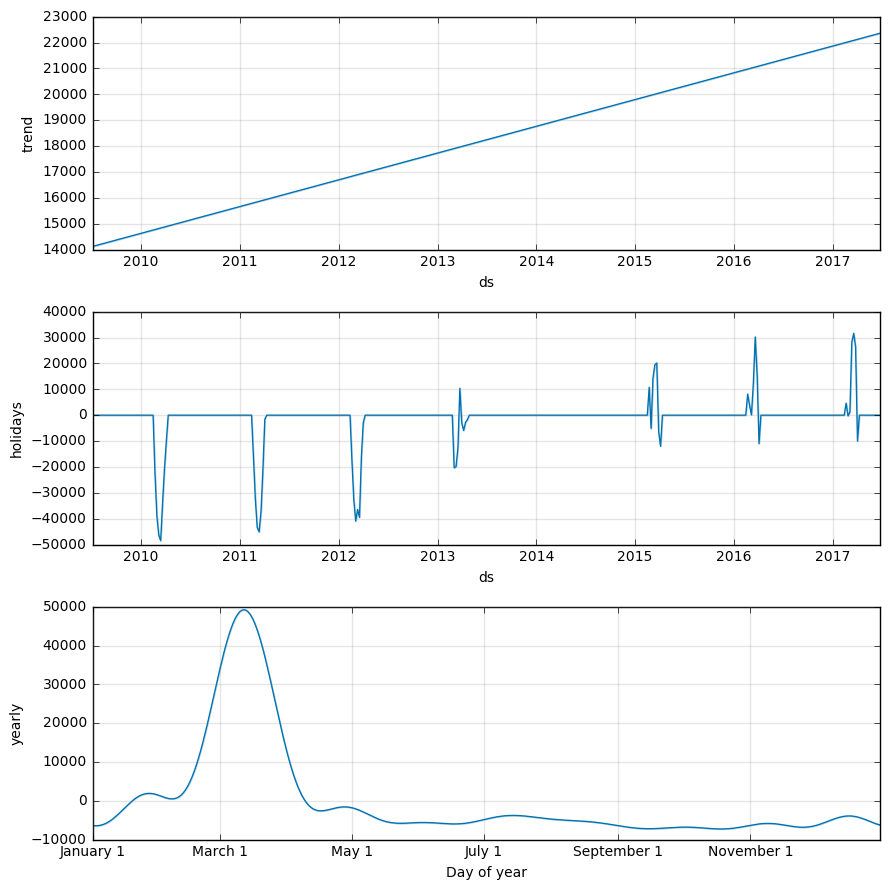

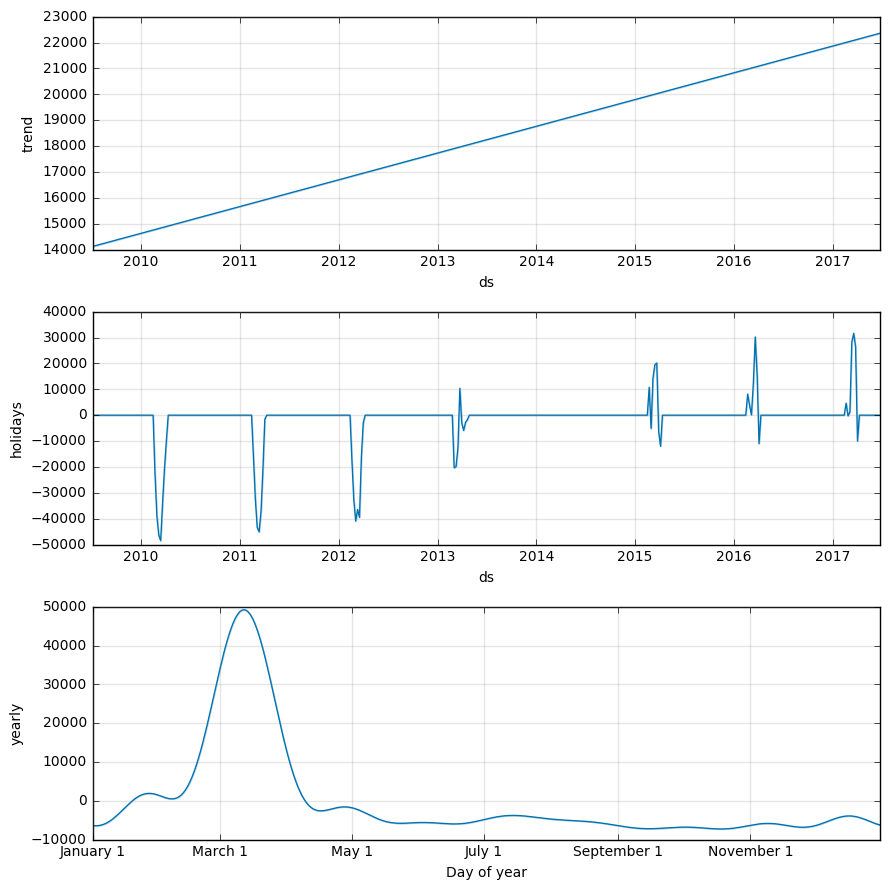

In [23]:
my_model.plot_components(forecast)

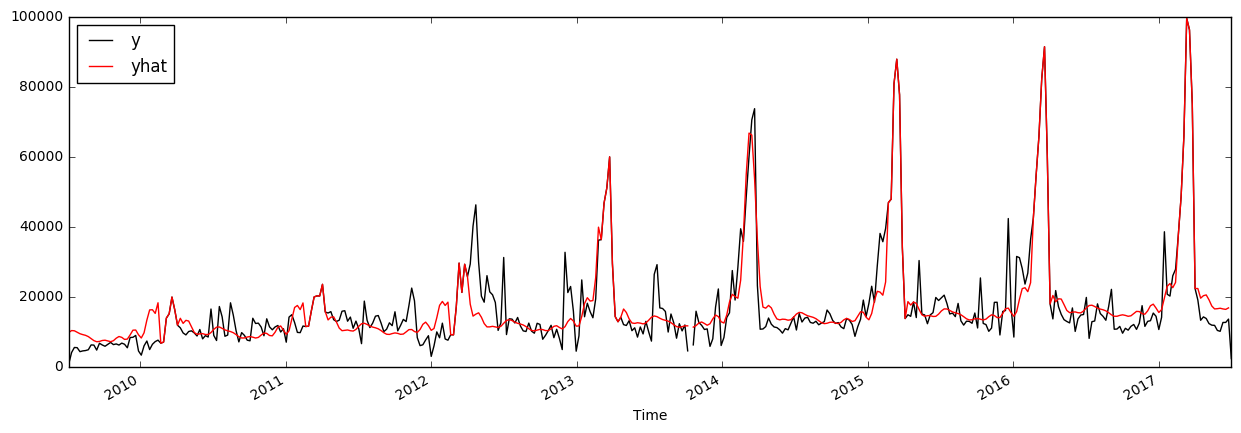

In [24]:
ans.index.name = "Time"
ans[['y', 'yhat']].plot(figsize=(15, 5), color = ('black', 'red'))

In [25]:
ans = ans.resample('Q').sum()
ans['diff'] = abs(ans['y']-ans['yhat'])
print("MAE :",ans['diff'].mean())
rl = ans['diff']/ans['y']
print("MAPE :", rl.mean() * 100)

MAE : 30731.6852386
MAPE : 17.3078673229


In [26]:
mask = (data_group['CASE_SUBMIT'] >= datelist[5][0]) & (data_group['CASE_SUBMIT'] <= datelist[5][1])
newdf = data_group.loc[mask]

valmask = (data_group['CASE_SUBMIT'] >= datelist[5][2]) & (data_group['CASE_SUBMIT'] <= datelist[5][3])
valdf = data_group.loc[valmask]

In [27]:
newdf = newdf.rename(columns={'CASE_SUBMIT': 'ds',
                        'TOTAL_WORKERS': 'y'})
valdf = valdf.rename(columns={'CASE_SUBMIT': 'ds',
                        'TOTAL_WORKERS': 'y'})


In [28]:
newdf = newdf.resample('W').sum()
valdf = valdf.resample('W').sum()

newdf['y'] = np.log(newdf['y'])
valdf['y'] = np.log(valdf['y'])

In [29]:
newdf['ds'] = newdf.index
newdf = newdf.reset_index(drop=True)
valdf['ds'] = valdf.index
valdf = valdf.reset_index(drop=True)

In [30]:
my_model = Prophet(holidays = hols, holidays_prior_scale=0.09).fit(newdf)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [31]:
future_dates = my_model.make_future_dataframe(periods=104, freq='W')
forecast = my_model.predict(future_dates)

In [32]:
fc = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
ans = fc.merge(valdf[-104:])

In [33]:
ans.index = ans.ds
ans1 = ans[['ds','y', 'yhat']]
ans1['y'] = np.exp(ans1['y'])
ans1['yhat'] = np.exp(ans1['yhat'])
ans1['diff'] = abs(ans1['y']-ans1['yhat'])
print("MAE ", ans1['diff'].mean())

rl = ans1['diff']/ans1['y']
print("MAPE :",rl.mean() * 100)

MAE  7738.80934933
MAPE : 43.4702955213


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [34]:
ans1.index = ans1.ds
ans1 = ans1.resample('Q').sum()
ans1['diff'] = abs(ans1['y']-ans1['yhat'])
print("MAE :",ans1['diff'].mean())
rl = ans1['diff']/ans1['y']
print("MAPE :",rl.mean() * 100)

MAE : 55502.0713551
MAPE : 35.1950864028


In [35]:
newdf.index = newdf.ds
newdf['yhat'] = None
newdf = newdf[['y', 'yhat']]
newdf.y = newdf['y']

In [36]:
pl = ans[['y','yhat']]

In [37]:
pl = pd.concat((newdf, pl))
pl['y'] = np.exp(pl['y'])
pl['yhat'] = np.exp(pl['yhat'])

In [38]:
pl.tail()

,y,yhat
ds,,
2017-03-05,65908.0,102100.374313
2017-03-12,99520.0,107589.058675
2017-03-19,96221.0,84540.917348
2017-03-26,75084.0,59052.988183
2017-04-02,21914.0,43293.646790


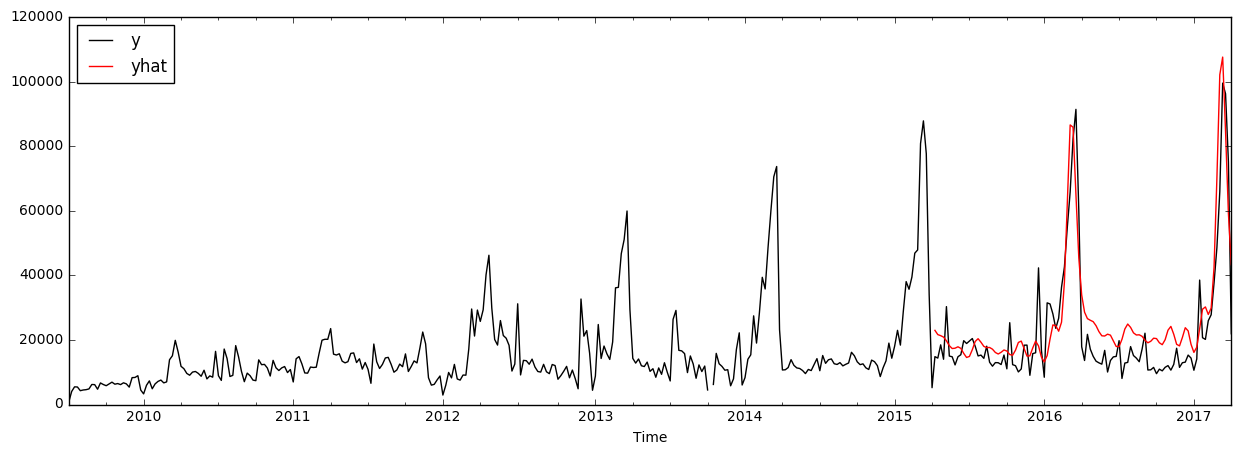

In [39]:
pl.index.name = "Time"
pl.plot(figsize=(15, 5), color = ('black', 'red'))

In [40]:
mask = (data_group['CASE_SUBMIT'] >= '2015-5-1') & (data_group['CASE_SUBMIT'] <= '2015-12-31')
newdf = data_group.loc[mask]
newdf.sum()

TOTAL_WORKERS    569453.0
dtype: float64

In [41]:
mask = (data_group['CASE_SUBMIT'] >= '2016-5-1') & (data_group['CASE_SUBMIT'] <= '2016-12-31')
newdf = data_group.loc[mask]
newdf.sum()

TOTAL_WORKERS    468317.0
dtype: float64

In [42]:
mask = (data_group['CASE_SUBMIT'] >= '2013-5-1') & (data_group['CASE_SUBMIT'] <= '2013-12-31')
newdf = data_group.loc[mask]
newdf.sum()

TOTAL_WORKERS    418868.0
dtype: float64

In [43]:
mask = (data_group['CASE_SUBMIT'] >= '2014-5-1') & (data_group['CASE_SUBMIT'] <= '2014-12-31')
newdf = data_group.loc[mask]
newdf.sum()

TOTAL_WORKERS    450352.0
dtype: float64

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Weekly
MAE : 94.9801104924
MAPE : 19.9399410178
Quarter
MAE : 847.690958458
MAPE : 33.334325604
R2 : 0.465626994929


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

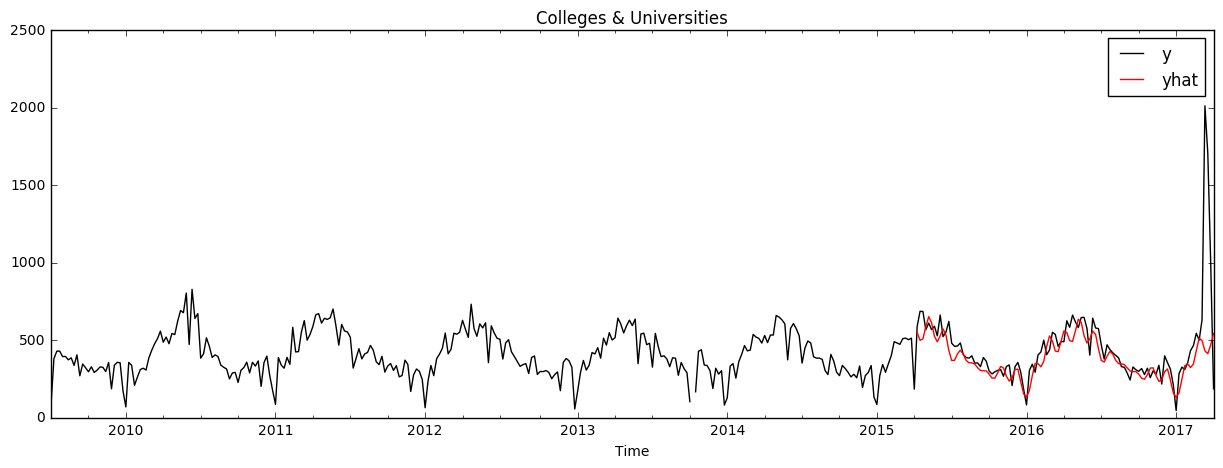

In [53]:
data_uni = data[data['NAICS_CLASSIFICATION'] == 'Colleges & Universities']
data_uni_group = data_uni.groupby(by = ['CASE_SUBMITTED']).sum()
data_uni_group['CASE_SUBMIT'] = data_uni_group.index
data_uni_group['CASE_SUBMIT'] = pd.DatetimeIndex(data_uni_group['CASE_SUBMIT'])
data_uni_group.index = data_uni_group['CASE_SUBMIT']

mask = (data_uni_group['CASE_SUBMIT'] >= datelist[5][0]) & (data_uni_group['CASE_SUBMIT'] <= datelist[5][1])
newdf = data_uni_group.loc[mask]

valmask = (data_uni_group['CASE_SUBMIT'] >= datelist[5][2]) & (data_uni_group['CASE_SUBMIT'] <= datelist[5][3])
valdf = data_uni_group.loc[valmask]

newdf = newdf.rename(columns={'CASE_SUBMIT': 'ds',
                        'TOTAL_WORKERS': 'y'})
valdf = valdf.rename(columns={'CASE_SUBMIT': 'ds',
                        'TOTAL_WORKERS': 'y'})

newdf = newdf.resample('W').sum()
valdf = valdf.resample('W').sum()

newdf['y'] = np.log(newdf['y'])
valdf['y'] = np.log(valdf['y'])

newdf['ds'] = newdf.index
newdf = newdf.reset_index(drop=True)
valdf['ds'] = valdf.index
valdf = valdf.reset_index(drop=True)

my_model = Prophet(holidays = hols, holidays_prior_scale=0.09).fit(newdf)

future_dates = my_model.make_future_dataframe(periods=104, freq='W')
forecast = my_model.predict(future_dates)
fc = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
ans = fc.merge(valdf[-104:])

print("Weekly")
ans1 = ans[['ds','y', 'yhat']]
ans1['y'] = np.exp(ans1['y'])
ans1['yhat'] = np.exp(ans1['yhat'])
ans1['diff'] = abs(ans1['y']-ans1['yhat'])
print('MAE :',ans1['diff'].mean())
rl = ans1['diff']/ans1['y']
print('MAPE :',rl.mean() * 100)
ans.index = ans.ds

print("Quarter")
ans1.index = ans1.ds
ans1 = ans1.resample('Q').sum()
ans1['diff'] = abs(ans1['y']-ans1['yhat'])
print("MAE :",ans1['diff'].mean())
rl = ans1['diff']/ans1['y']
print("MAPE :",rl.mean() * 100)

ybar = ans1['y'].mean()
SSy = ((ans1['yhat'] - ybar)**2).sum()
e2 = ((ans1['yhat'] - ans1['y'])**2).sum()
print ('R2 :', 1 - e2/SSy)

newdf.index = newdf.ds
newdf['yhat'] = None
newdf = newdf[['y', 'yhat']]
newdf.y = newdf['y']

pl = ans[['y','yhat']]
pl = pd.concat((newdf, pl))
pl['y'] = np.exp(pl['y'])
pl['yhat'] = np.exp(pl['yhat'])
pl.index.name = "Time"
pl.plot(figsize=(15, 5), color = ('black', 'red'), title = 'Colleges & Universities')

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Weekly
MAE : 4579.9534557
MAPE : 52.2260583817
Quarter
MAE : 28321.1874621
MAPE : 29.9176405743
R2 : 0.847293809516


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

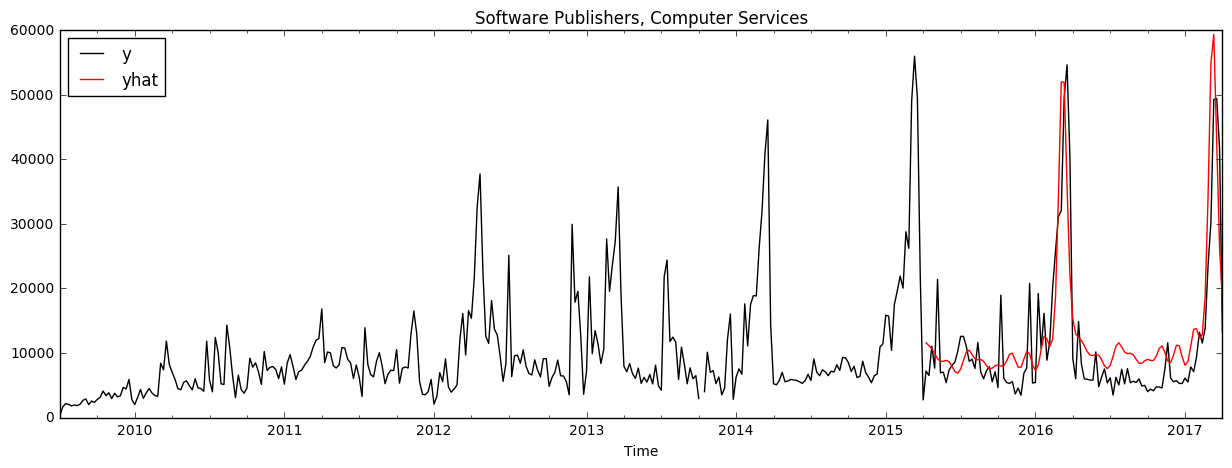

In [52]:
data_uni = data[data['NAICS_CLASSIFICATION'] == 'Software Publishers, Computer Services']
data_uni_group = data_uni.groupby(by = ['CASE_SUBMITTED']).sum()
data_uni_group['CASE_SUBMIT'] = data_uni_group.index
data_uni_group['CASE_SUBMIT'] = pd.DatetimeIndex(data_uni_group['CASE_SUBMIT'])
data_uni_group.index = data_uni_group['CASE_SUBMIT']

mask = (data_uni_group['CASE_SUBMIT'] >= datelist[5][0]) & (data_uni_group['CASE_SUBMIT'] <= datelist[5][1])
newdf = data_uni_group.loc[mask]

valmask = (data_uni_group['CASE_SUBMIT'] >= datelist[5][2]) & (data_uni_group['CASE_SUBMIT'] <= datelist[5][3])
valdf = data_uni_group.loc[valmask]

newdf = newdf.rename(columns={'CASE_SUBMIT': 'ds',
                        'TOTAL_WORKERS': 'y'})
valdf = valdf.rename(columns={'CASE_SUBMIT': 'ds',
                        'TOTAL_WORKERS': 'y'})

newdf = newdf.resample('W').sum()
valdf = valdf.resample('W').sum()

newdf['y'] = np.log(newdf['y'])
valdf['y'] = np.log(valdf['y'])

newdf['ds'] = newdf.index
newdf = newdf.reset_index(drop=True)
valdf['ds'] = valdf.index
valdf = valdf.reset_index(drop=True)

my_model = Prophet(holidays = hols, holidays_prior_scale=5).fit(newdf)

future_dates = my_model.make_future_dataframe(periods=104, freq='W')
forecast = my_model.predict(future_dates)
fc = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
ans = fc.merge(valdf[-104:])

print("Weekly")
ans1 = ans[['ds','y', 'yhat']]
ans.index = ans.ds
ans1['y'] = np.exp(ans1['y'])
ans1['yhat'] = np.exp(ans1['yhat'])
ans1['diff'] = abs(ans1['y']-ans1['yhat'])
print('MAE :',ans1['diff'].mean())
rl = ans1['diff']/ans1['y']
print('MAPE :',rl.mean() * 100)

print("Quarter")
ans1.index = ans1.ds
ans1 = ans1.resample('Q').sum()
ans1['diff'] = abs(ans1['y']-ans1['yhat'])
print("MAE :",ans1['diff'].mean())
rl = ans1['diff']/ans1['y']
print("MAPE :",rl.mean() * 100)

ybar = ans1['y'].mean()
SSy = ((ans1['yhat'] - ybar)**2).sum()
e2 = ((ans1['yhat'] - ans1['y'])**2).sum()
print ('R2 :', 1 - e2/SSy)

newdf.index = newdf.ds
newdf['yhat'] = None
newdf = newdf[['y', 'yhat']]
newdf.y = newdf['y']

pl = ans[['y','yhat']]
pl = pd.concat((newdf, pl))
pl['y'] = np.exp(pl['y'])
pl['yhat'] = np.exp(pl['yhat'])
pl.index.name = "Time"
pl.plot(figsize=(15, 5), color = ('black', 'red'), title = 'Software Publishers, Computer Services')

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Weekly


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

MAE : 599.741699376
MAPE : 38.8567212167
Quarter
MAE : 3642.39400106
MAPE : 30.9759535846
R2 : 0.856848532398


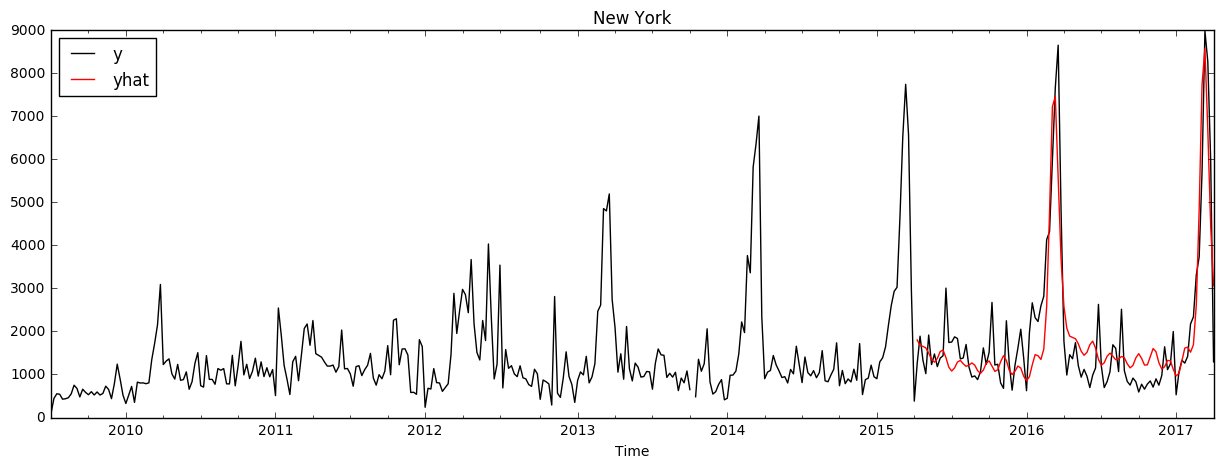

In [69]:
data_uni = data[data['WORKSITE_STATE'] == 'NY']
data_uni_group = data_uni.groupby(by = ['CASE_SUBMITTED']).sum()
data_uni_group['CASE_SUBMIT'] = data_uni_group.index
data_uni_group['CASE_SUBMIT'] = pd.DatetimeIndex(data_uni_group['CASE_SUBMIT'])
data_uni_group.index = data_uni_group['CASE_SUBMIT']

mask = (data_uni_group['CASE_SUBMIT'] >= datelist[5][0]) & (data_uni_group['CASE_SUBMIT'] <= datelist[5][1])
newdf = data_uni_group.loc[mask]

valmask = (data_uni_group['CASE_SUBMIT'] >= datelist[5][2]) & (data_uni_group['CASE_SUBMIT'] <= datelist[5][3])
valdf = data_uni_group.loc[valmask]

newdf = newdf.rename(columns={'CASE_SUBMIT': 'ds',
                        'TOTAL_WORKERS': 'y'})
valdf = valdf.rename(columns={'CASE_SUBMIT': 'ds',
                        'TOTAL_WORKERS': 'y'})

newdf = newdf.resample('W').sum()
valdf = valdf.resample('W').sum()

newdf['y'] = np.log(newdf['y'])
valdf['y'] = np.log(valdf['y'])

newdf['ds'] = newdf.index
newdf = newdf.reset_index(drop=True)
valdf['ds'] = valdf.index
valdf = valdf.reset_index(drop=True)

my_model = Prophet(holidays = hols, holidays_prior_scale=0.24).fit(newdf)

future_dates = my_model.make_future_dataframe(periods=104, freq='W')
forecast = my_model.predict(future_dates)
fc = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
ans = fc.merge(valdf[-104:])

print("Weekly")
ans1 = ans[['ds','y', 'yhat']]
ans.index = ans.ds
ans1['y'] = np.exp(ans1['y'])
ans1['yhat'] = np.exp(ans1['yhat'])
ans1['diff'] = abs(ans1['y']-ans1['yhat'])
print('MAE :',ans1['diff'].mean())
rl = ans1['diff']/ans1['y']
print('MAPE :',rl.mean() * 100)

print("Quarter")
ans1.index = ans1.ds
ans1 = ans1.resample('Q').sum()
ans1['diff'] = abs(ans1['y']-ans1['yhat'])
print("MAE :",ans1['diff'].mean())
rl = ans1['diff']/ans1['y']
print("MAPE :",rl.mean() * 100)

ybar = ans1['y'].mean()
SSy = ((ans1['yhat'] - ybar)**2).sum()
e2 = ((ans1['yhat'] - ans1['y'])**2).sum()
print ('R2 :', 1 - e2/SSy)

newdf.index = newdf.ds
newdf['yhat'] = None
newdf = newdf[['y', 'yhat']]
newdf.y = newdf['y']

pl = ans[['y','yhat']]
pl = pd.concat((newdf, pl))
pl['y'] = np.exp(pl['y'])
pl['yhat'] = np.exp(pl['yhat'])
pl.index.name = "Time"
pl.plot(figsize=(15, 5), color = ('black', 'red'), title = 'New York')

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Weekly


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

MAE : 1483.48498776
MAPE : 30.3631684127
Quarter
MAE : 12442.593223
MAPE : 22.6436116827
R2 : 0.446006541975


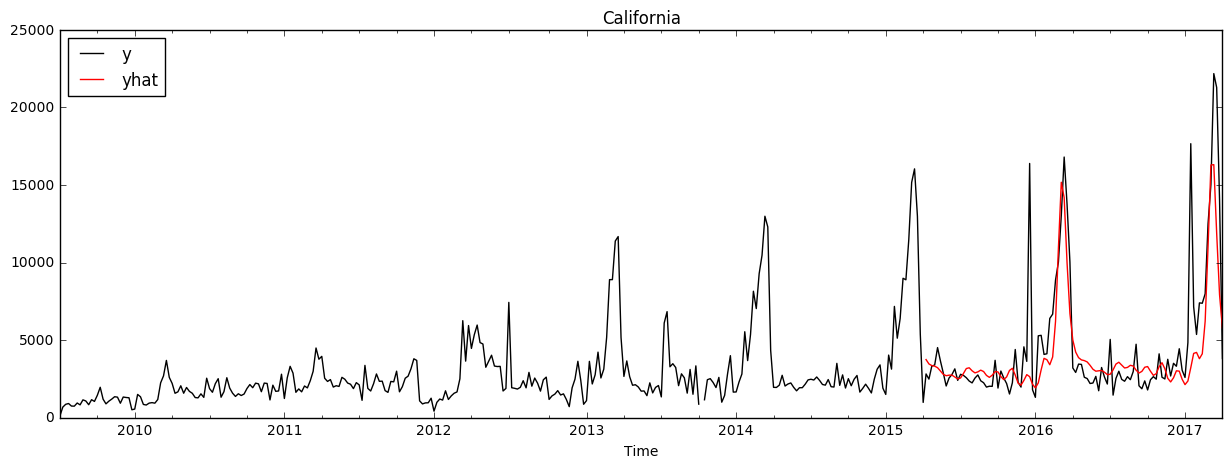

In [70]:
data_uni = data[data['WORKSITE_STATE'] == 'CA']
data_uni_group = data_uni.groupby(by = ['CASE_SUBMITTED']).sum()
data_uni_group['CASE_SUBMIT'] = data_uni_group.index
data_uni_group['CASE_SUBMIT'] = pd.DatetimeIndex(data_uni_group['CASE_SUBMIT'])
data_uni_group.index = data_uni_group['CASE_SUBMIT']

mask = (data_uni_group['CASE_SUBMIT'] >= datelist[5][0]) & (data_uni_group['CASE_SUBMIT'] <= datelist[5][1])
newdf = data_uni_group.loc[mask]

valmask = (data_uni_group['CASE_SUBMIT'] >= datelist[5][2]) & (data_uni_group['CASE_SUBMIT'] <= datelist[5][3])
valdf = data_uni_group.loc[valmask]

newdf = newdf.rename(columns={'CASE_SUBMIT': 'ds',
                        'TOTAL_WORKERS': 'y'})
valdf = valdf.rename(columns={'CASE_SUBMIT': 'ds',
                        'TOTAL_WORKERS': 'y'})

newdf = newdf.resample('W').sum()
valdf = valdf.resample('W').sum()

newdf['y'] = np.log(newdf['y'])
valdf['y'] = np.log(valdf['y'])

newdf['ds'] = newdf.index
newdf = newdf.reset_index(drop=True)
valdf['ds'] = valdf.index
valdf = valdf.reset_index(drop=True)

my_model = Prophet(holidays = hols, holidays_prior_scale=0.24).fit(newdf)

future_dates = my_model.make_future_dataframe(periods=104, freq='W')
forecast = my_model.predict(future_dates)
fc = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
ans = fc.merge(valdf[-104:])

print("Weekly")
ans1 = ans[['ds','y', 'yhat']]
ans.index = ans.ds
ans1['y'] = np.exp(ans1['y'])
ans1['yhat'] = np.exp(ans1['yhat'])
ans1['diff'] = abs(ans1['y']-ans1['yhat'])
print('MAE :',ans1['diff'].mean())
rl = ans1['diff']/ans1['y']
print('MAPE :',rl.mean() * 100)

print("Quarter")
ans1.index = ans1.ds
ans1 = ans1.resample('Q').sum()
ans1['diff'] = abs(ans1['y']-ans1['yhat'])
print("MAE :",ans1['diff'].mean())
rl = ans1['diff']/ans1['y']
print("MAPE :",rl.mean() * 100)

ybar = ans1['y'].mean()
SSy = ((ans1['yhat'] - ybar)**2).sum()
e2 = ((ans1['yhat'] - ans1['y'])**2).sum()
print ('R2 :', 1 - e2/SSy)

newdf.index = newdf.ds
newdf['yhat'] = None
newdf = newdf[['y', 'yhat']]
newdf.y = newdf['y']

pl = ans[['y','yhat']]
pl = pd.concat((newdf, pl))
pl['y'] = np.exp(pl['y'])
pl['yhat'] = np.exp(pl['yhat'])
pl.index.name = "Time"
pl.plot(figsize=(15, 5), color = ('black', 'red'), title = 'California')